# House Prices - Advanced Regression Techniques
### 7th

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("Desktop/train.csv")

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.shape

(1460, 81)

In [8]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
train.dropna(subset=['LotFrontage'], inplace=True)

In [11]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [12]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Our data cleaned!

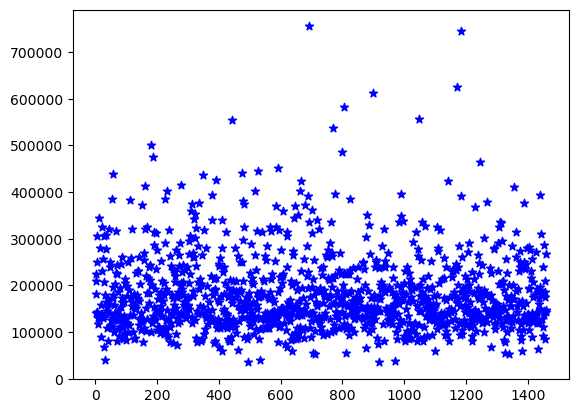

In [13]:
X = train.Id
Y = train.SalePrice
plt.scatter(X , Y , marker = "*" , c = "blue")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


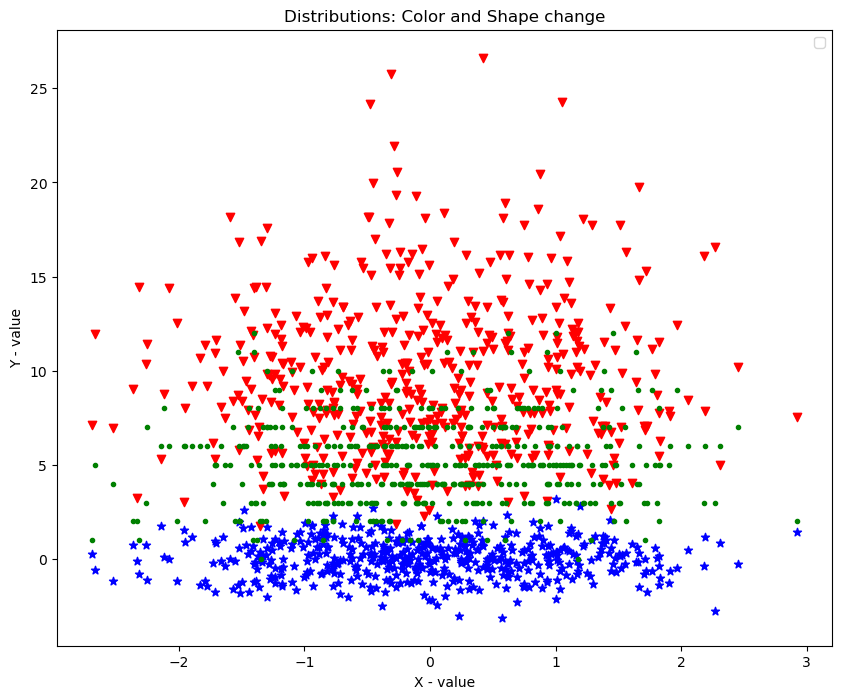

In [14]:
X = train.SalePrice
Y1 = train.Id
Y2 = train.LotArea
Y3 = train.LotFrontage
# Scatterplot of different distributions. Color and Shape of Points.
X = np.random.randn(500)
Y1 = np.random.randn(500)
Y2 = np.random.chisquare(10, 500)
Y3 = np.random.poisson(5, 500)

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(X,Y1,color='blue', marker= '*')
plt.scatter(X,Y2,color= 'red', marker='v')
plt.scatter(X,Y3,color= 'green', marker='.')


# Decorate
plt.title('Distributions: Color and Shape change')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.legend(loc='best')
plt.show()


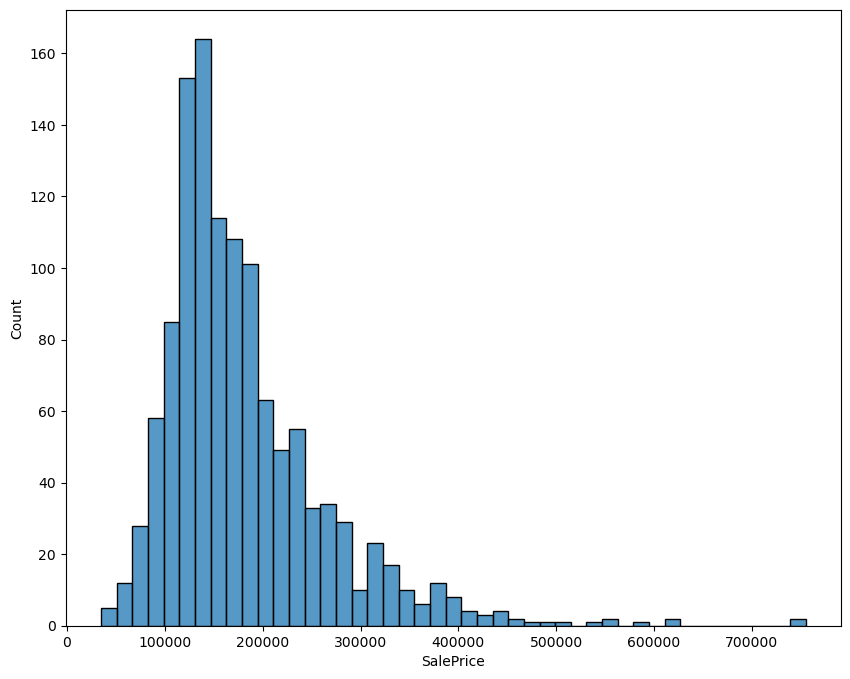

In [15]:
fig = sns.histplot(train["SalePrice"])

array([[<Axes: xlabel='Id', ylabel='Id'>,
        <Axes: xlabel='MSSubClass', ylabel='Id'>,
        <Axes: xlabel='LotFrontage', ylabel='Id'>, ...,
        <Axes: xlabel='MoSold', ylabel='Id'>,
        <Axes: xlabel='YrSold', ylabel='Id'>,
        <Axes: xlabel='SalePrice', ylabel='Id'>],
       [<Axes: xlabel='Id', ylabel='MSSubClass'>,
        <Axes: xlabel='MSSubClass', ylabel='MSSubClass'>,
        <Axes: xlabel='LotFrontage', ylabel='MSSubClass'>, ...,
        <Axes: xlabel='MoSold', ylabel='MSSubClass'>,
        <Axes: xlabel='YrSold', ylabel='MSSubClass'>,
        <Axes: xlabel='SalePrice', ylabel='MSSubClass'>],
       [<Axes: xlabel='Id', ylabel='LotFrontage'>,
        <Axes: xlabel='MSSubClass', ylabel='LotFrontage'>,
        <Axes: xlabel='LotFrontage', ylabel='LotFrontage'>, ...,
        <Axes: xlabel='MoSold', ylabel='LotFrontage'>,
        <Axes: xlabel='YrSold', ylabel='LotFrontage'>,
        <Axes: xlabel='SalePrice', ylabel='LotFrontage'>],
       ...,
       [<Axes: x

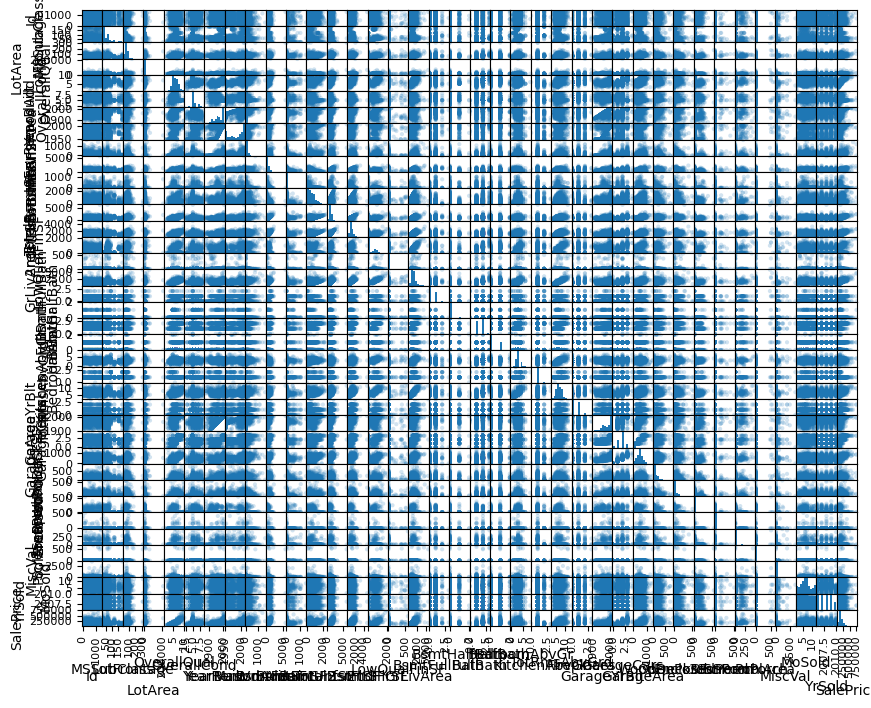

In [16]:
pd.plotting.scatter_matrix(train , alpha = 0.2)

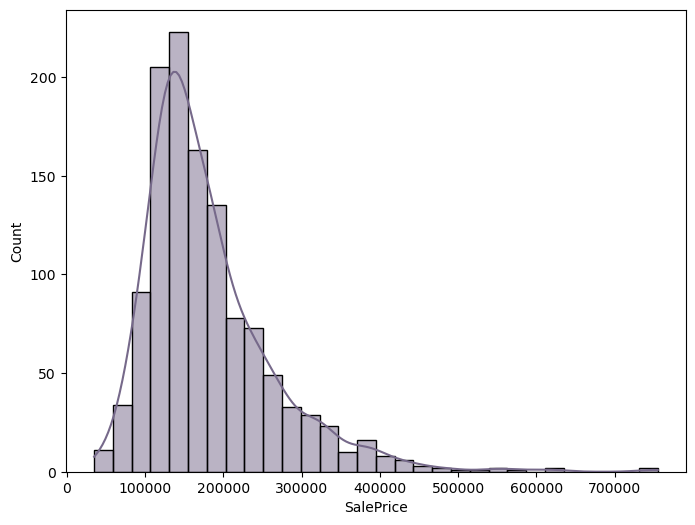

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], bins=30, kde=True, color='#76698a')
plt.show()

### for numerical values :

In [18]:
train_num = train.select_dtypes(include = ['float64' , 'int64'])

In [19]:
train_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

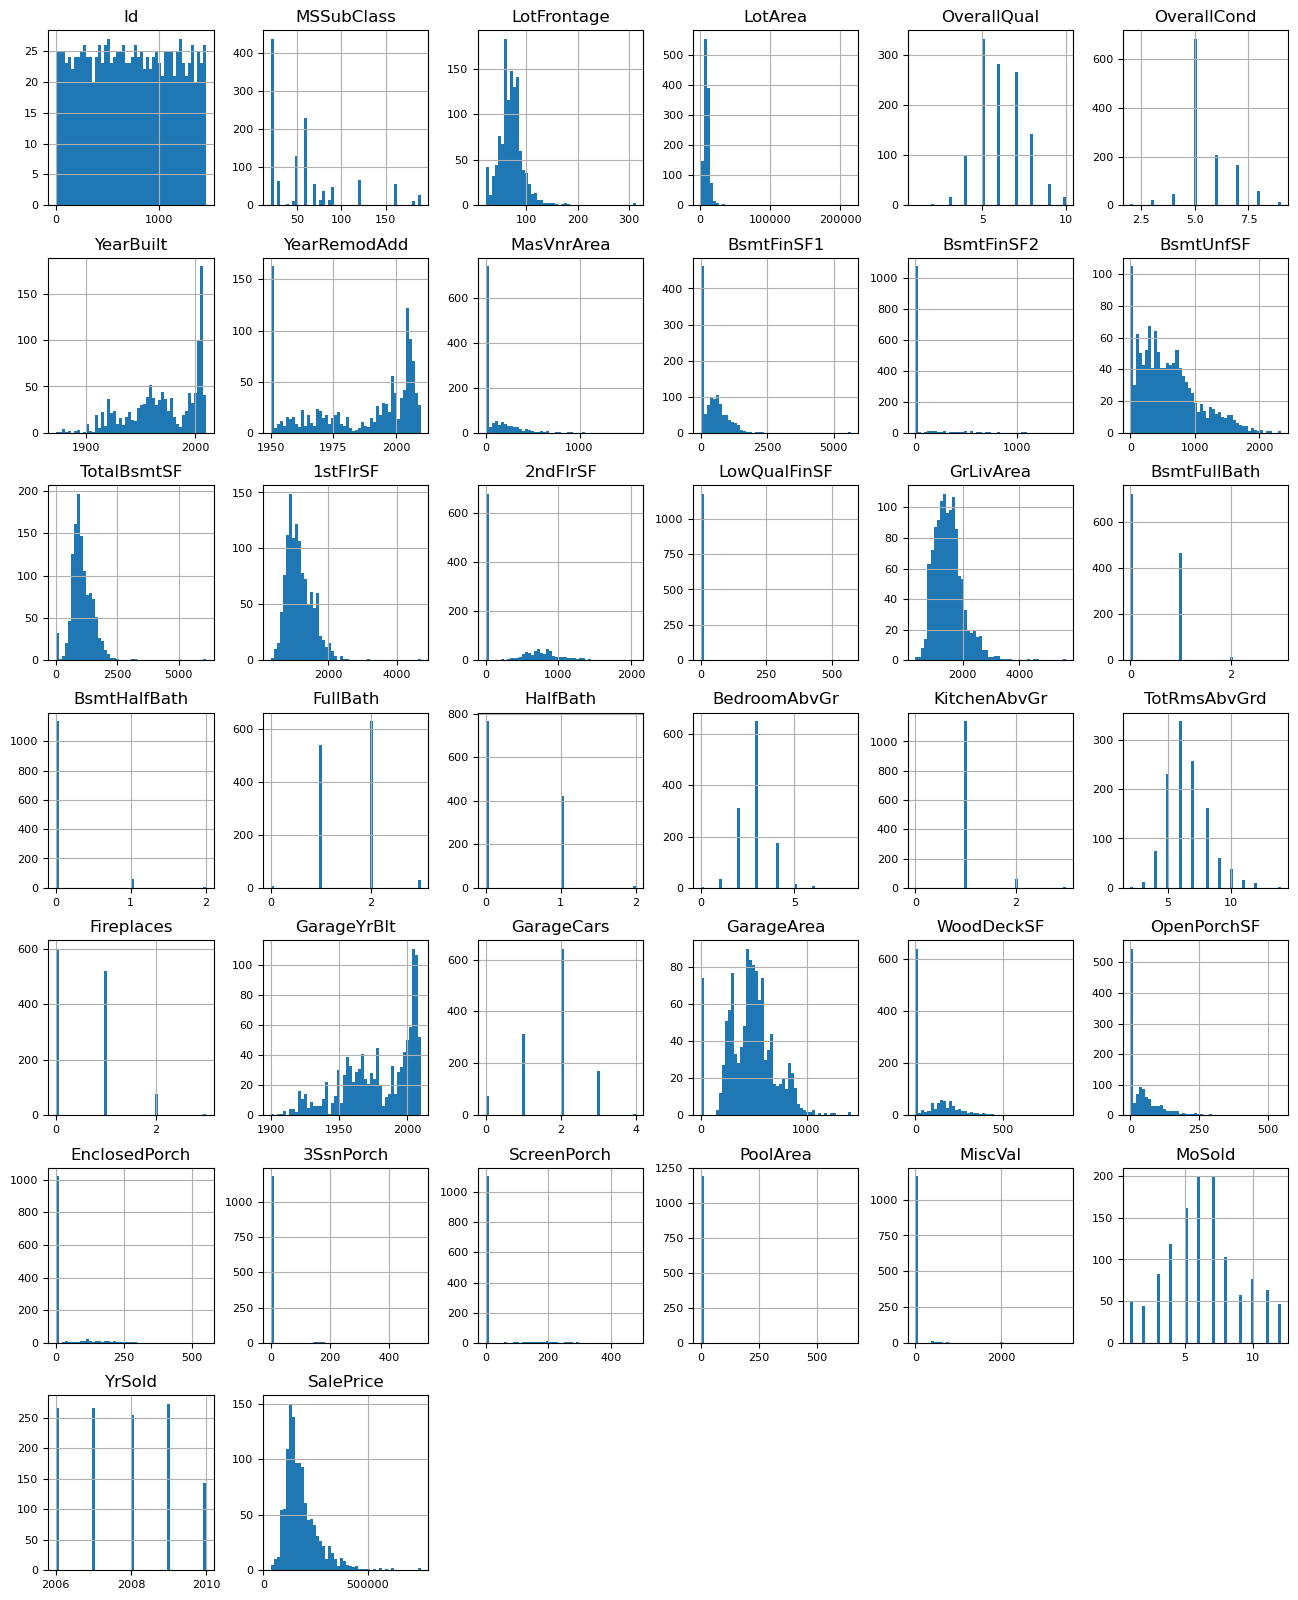

In [20]:
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

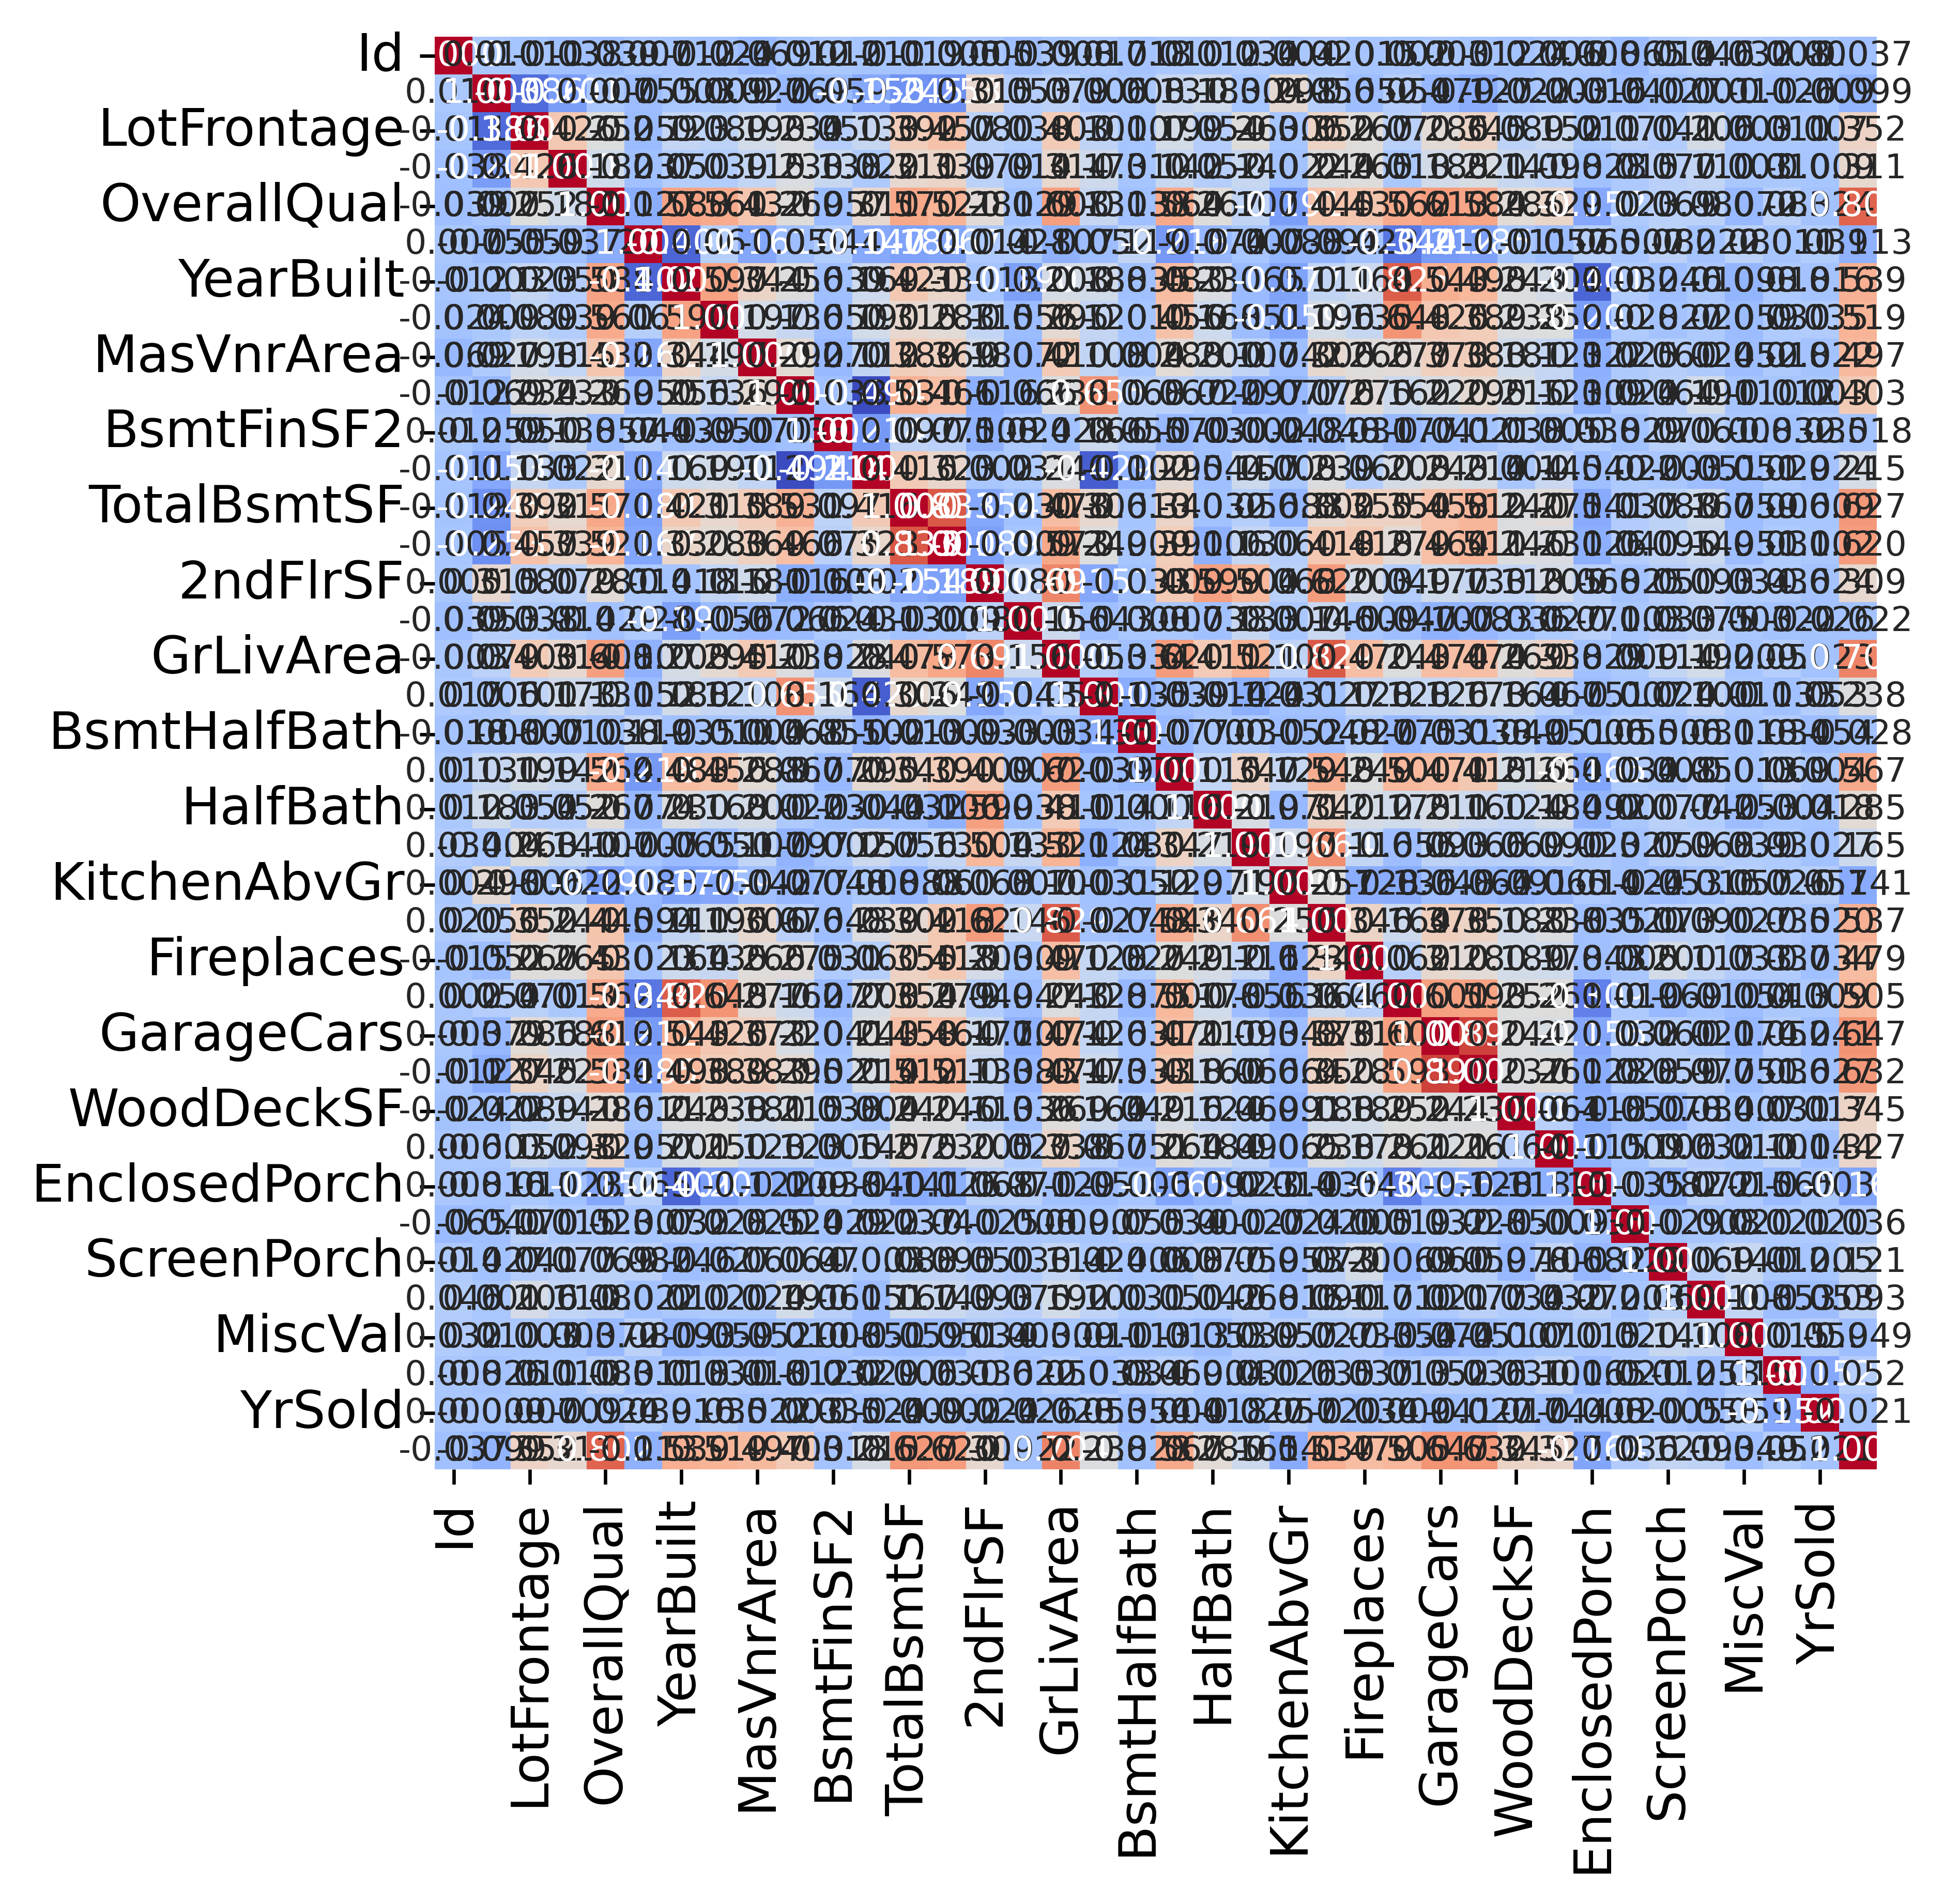

In [21]:
columns_colors = [column for column in train.columns if train[column].dtype != "object"]
corr_matrix = train[columns_colors].corr()
plt.figure(figsize=(6, 6), 
           dpi = 600) 

sns.heatmap(corr_matrix.select_dtypes(include = ['int64' , 'float64']), annot=True, cmap='coolwarm', fmt=".3f",cbar=False , annot_kws={"size": 8})
plt.tick_params(axis = 'x', labelsize = 12) # x font label size
plt.tick_params(axis = 'y', labelsize = 12) # y font label size
plt.show()

# bake a model soon ...

In [22]:
X_train = train.drop(columns = ["SalePrice"])
Y_train = train.SalePrice

In [23]:
X_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [24]:
X_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [25]:
Y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# find unique values of X_train

In [26]:
for col in X_train.columns:
    u = X_train[col].unique()
print(u)

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


# hahahaha! we have more than 1 & 2 & 3 ... features ! we must use CatBoostRegressor(**params)

###     Python packageCatBoostRegressorset_params

# set_params

# Set the training parameters.
# Method call format

# set_params(** params)

# Parameters
# **params
# Description

# A list of parameters to start training with.

# If omitted, default values are used.

# If set, the passed list of parameters overrides the default values.

In [27]:
#Description random_strength    #جلوگیری از برازش بیش از حد

#The amount of randomness to use for scoring splits when the tree structure is selected. Use this parameter to avoid overfitting the model.

#The value of this parameter is used when selecting splits. On every iteration each possible split gets a score (for example, the score indicates how much adding this split will improve the loss function for the training dataset). The split with the highest score is selected.

#The scores have no randomness. A normally distributed random variable is added to the score of the feature. It has a zero mean and a variance that decreases during the training. The value of this parameter is the multiplier of the variance.

In [28]:
#n_estimate & iteration    #بیشترین مقدار درخت برای حل سوال توسط ماشین لرنینگ
#Description

#The maximum number of trees that can be built when solving machine learning problems.

#When using other parameters that limit the number of iterations, the final number of trees may be less than the number specified in this parameter.

In [29]:
#max_depth #عمق درخت
#Depth of the trees.

#The range of supported values depends on the processing unit type and the type of the selected loss function:

    #CPU — Any integer up to  16.

    #GPU — Any integer up to 8 for pairwise modes (YetiRank, PairLogitPairwise, and QueryCrossEntropy), and up to 16 for all other loss functions.


In [30]:
#loss_finction
#The metric to use in training. The specified value also determines the machine learning problem to solve. Some metrics support optional parameters

In [31]:
#The learning rate.  #کاهش گرادیان

#Used for reducing the gradient step.

In [32]:
#colsample_bylevel   #چه درصدی از هر فیچر انتخاب شود
#Random subspace method. The percentage of features to use at each split selection, when features are selected over again at random.
#The value must be in the range (0;1].

In [33]:
#Bootstrap type. Defines the method for sampling the weights of objects.
#متدی برای وزن دهی به اشیا
#Supported methods:

    #Bayesian
    #Bernoulli
    #MVS
    #Poisson (supported for GPU only)
    #No

In [34]:
#bagging_temperature                settings of the Bayesian bootstrap
#Defines the settings of the Bayesian bootstrap. It is used by default in classification and regression modes.

#Use the Bayesian bootstrap to assign random weights to objects.

#The weights are sampled from exponential distribution if the value of this parameter is set to "1". All weights are equal to 1 if the value of this parameter is set to "0".

#Possible values are in the range [0;inf⁡)[0;inf). The higher the value the more aggressive the bagging is.

#This parameter can be used if the selected bootstrap type is Bayesian.

In [35]:
params = {'random_strength': 1 , 'n_estimators': 100,'max_depth': 7 , 'loss_function':'RMSE' , 'learning_rate' : 0.1 ,  'colsample_bylevel': 0.8,
         'bootstrap_type': 'MVS', 'bagging_temperature': 1.0}

In [36]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(**params)

In [37]:
X_train = train.select_dtypes(include = ['float64' , 'int64'])
model.fit(X_train , Y_train)

0:	learn: 77039.8260428	total: 138ms	remaining: 13.7s
1:	learn: 70796.1668303	total: 143ms	remaining: 7s
2:	learn: 65208.4900946	total: 146ms	remaining: 4.73s
3:	learn: 61071.1346570	total: 150ms	remaining: 3.61s
4:	learn: 56618.9121504	total: 154ms	remaining: 2.93s
5:	learn: 52580.4774443	total: 158ms	remaining: 2.48s
6:	learn: 49111.9662090	total: 162ms	remaining: 2.15s
7:	learn: 46013.2438241	total: 165ms	remaining: 1.9s
8:	learn: 43013.2356966	total: 168ms	remaining: 1.7s
9:	learn: 40110.9452239	total: 173ms	remaining: 1.55s
10:	learn: 37681.3741844	total: 178ms	remaining: 1.44s
11:	learn: 35391.0515161	total: 182ms	remaining: 1.33s
12:	learn: 33105.1217598	total: 186ms	remaining: 1.24s
13:	learn: 31154.8739398	total: 189ms	remaining: 1.16s
14:	learn: 29008.9714256	total: 195ms	remaining: 1.1s
15:	learn: 27336.0993540	total: 198ms	remaining: 1.04s
16:	learn: 25782.5442023	total: 202ms	remaining: 987ms
17:	learn: 24315.3115123	total: 206ms	remaining: 940ms
18:	learn: 22968.5037906	t

In [38]:
Y_predict = model.predict(X_train)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("MSE: ", mean_squared_error(Y_train, Y_predict))
print("MAE: ", mean_absolute_error(Y_train, Y_predict))
print("R2: ", r2_score(Y_train, Y_predict))
print("RMSE: ", mean_squared_error(Y_train, Y_predict, squared=False))

MSE:  13356114.865772475
MAE:  2760.441657183406
R2:  0.9980777097631468
RMSE:  3654.6018751394076


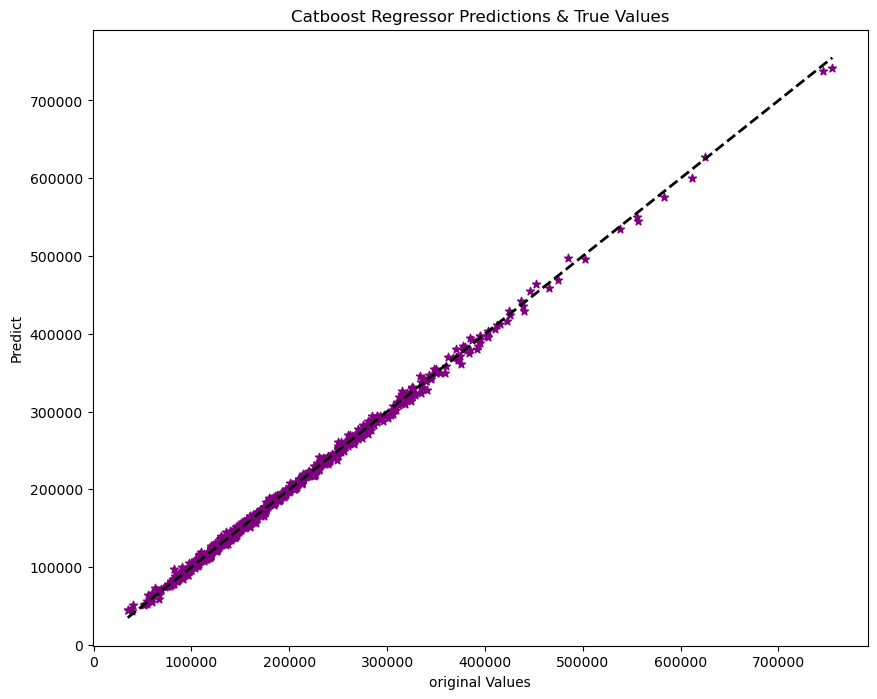

In [40]:
plt.scatter(Y_train,Y_predict, marker = '*' , c = 'purple')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)],linestyle='--', color='black', linewidth=2)
plt.xlabel("original Values")
plt.ylabel("Predict")
plt.title("Catboost Regressor Predictions & True Values")
plt.show()

In [41]:
score = model.score(X_train , Y_train)

In [42]:
score

0.9980777097631468